Classificadores

- Floresta aleatória (Random Forest)

### Floresta Aleatória

A floresta aleatória ou floresta de decisão aleatória é um algoritmo, modelo, de aprendizado de máquina supervisionado usado para classificação, regressão e outras tarefas usando árvores de decisão.

Uma floresta aleatória é um metaestimador que ajusta uma série de classificadores de árvores de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o sobreajuste. Árvores na floresta usam a melhor estratégia de divisão, ou seja, equivalente a passar splitter="best" para o DecisionTreeRegressor subjacente. O tamanho da subamostra é controlado com o parâmetro max_samples se bootstrap=True (padrão), caso contrário, todo o conjunto de dados é usado para construir cada árvore.

[Scikit-learn site]

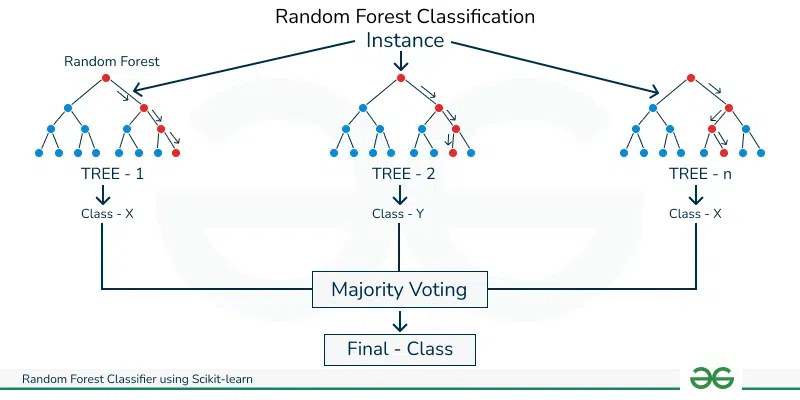

https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

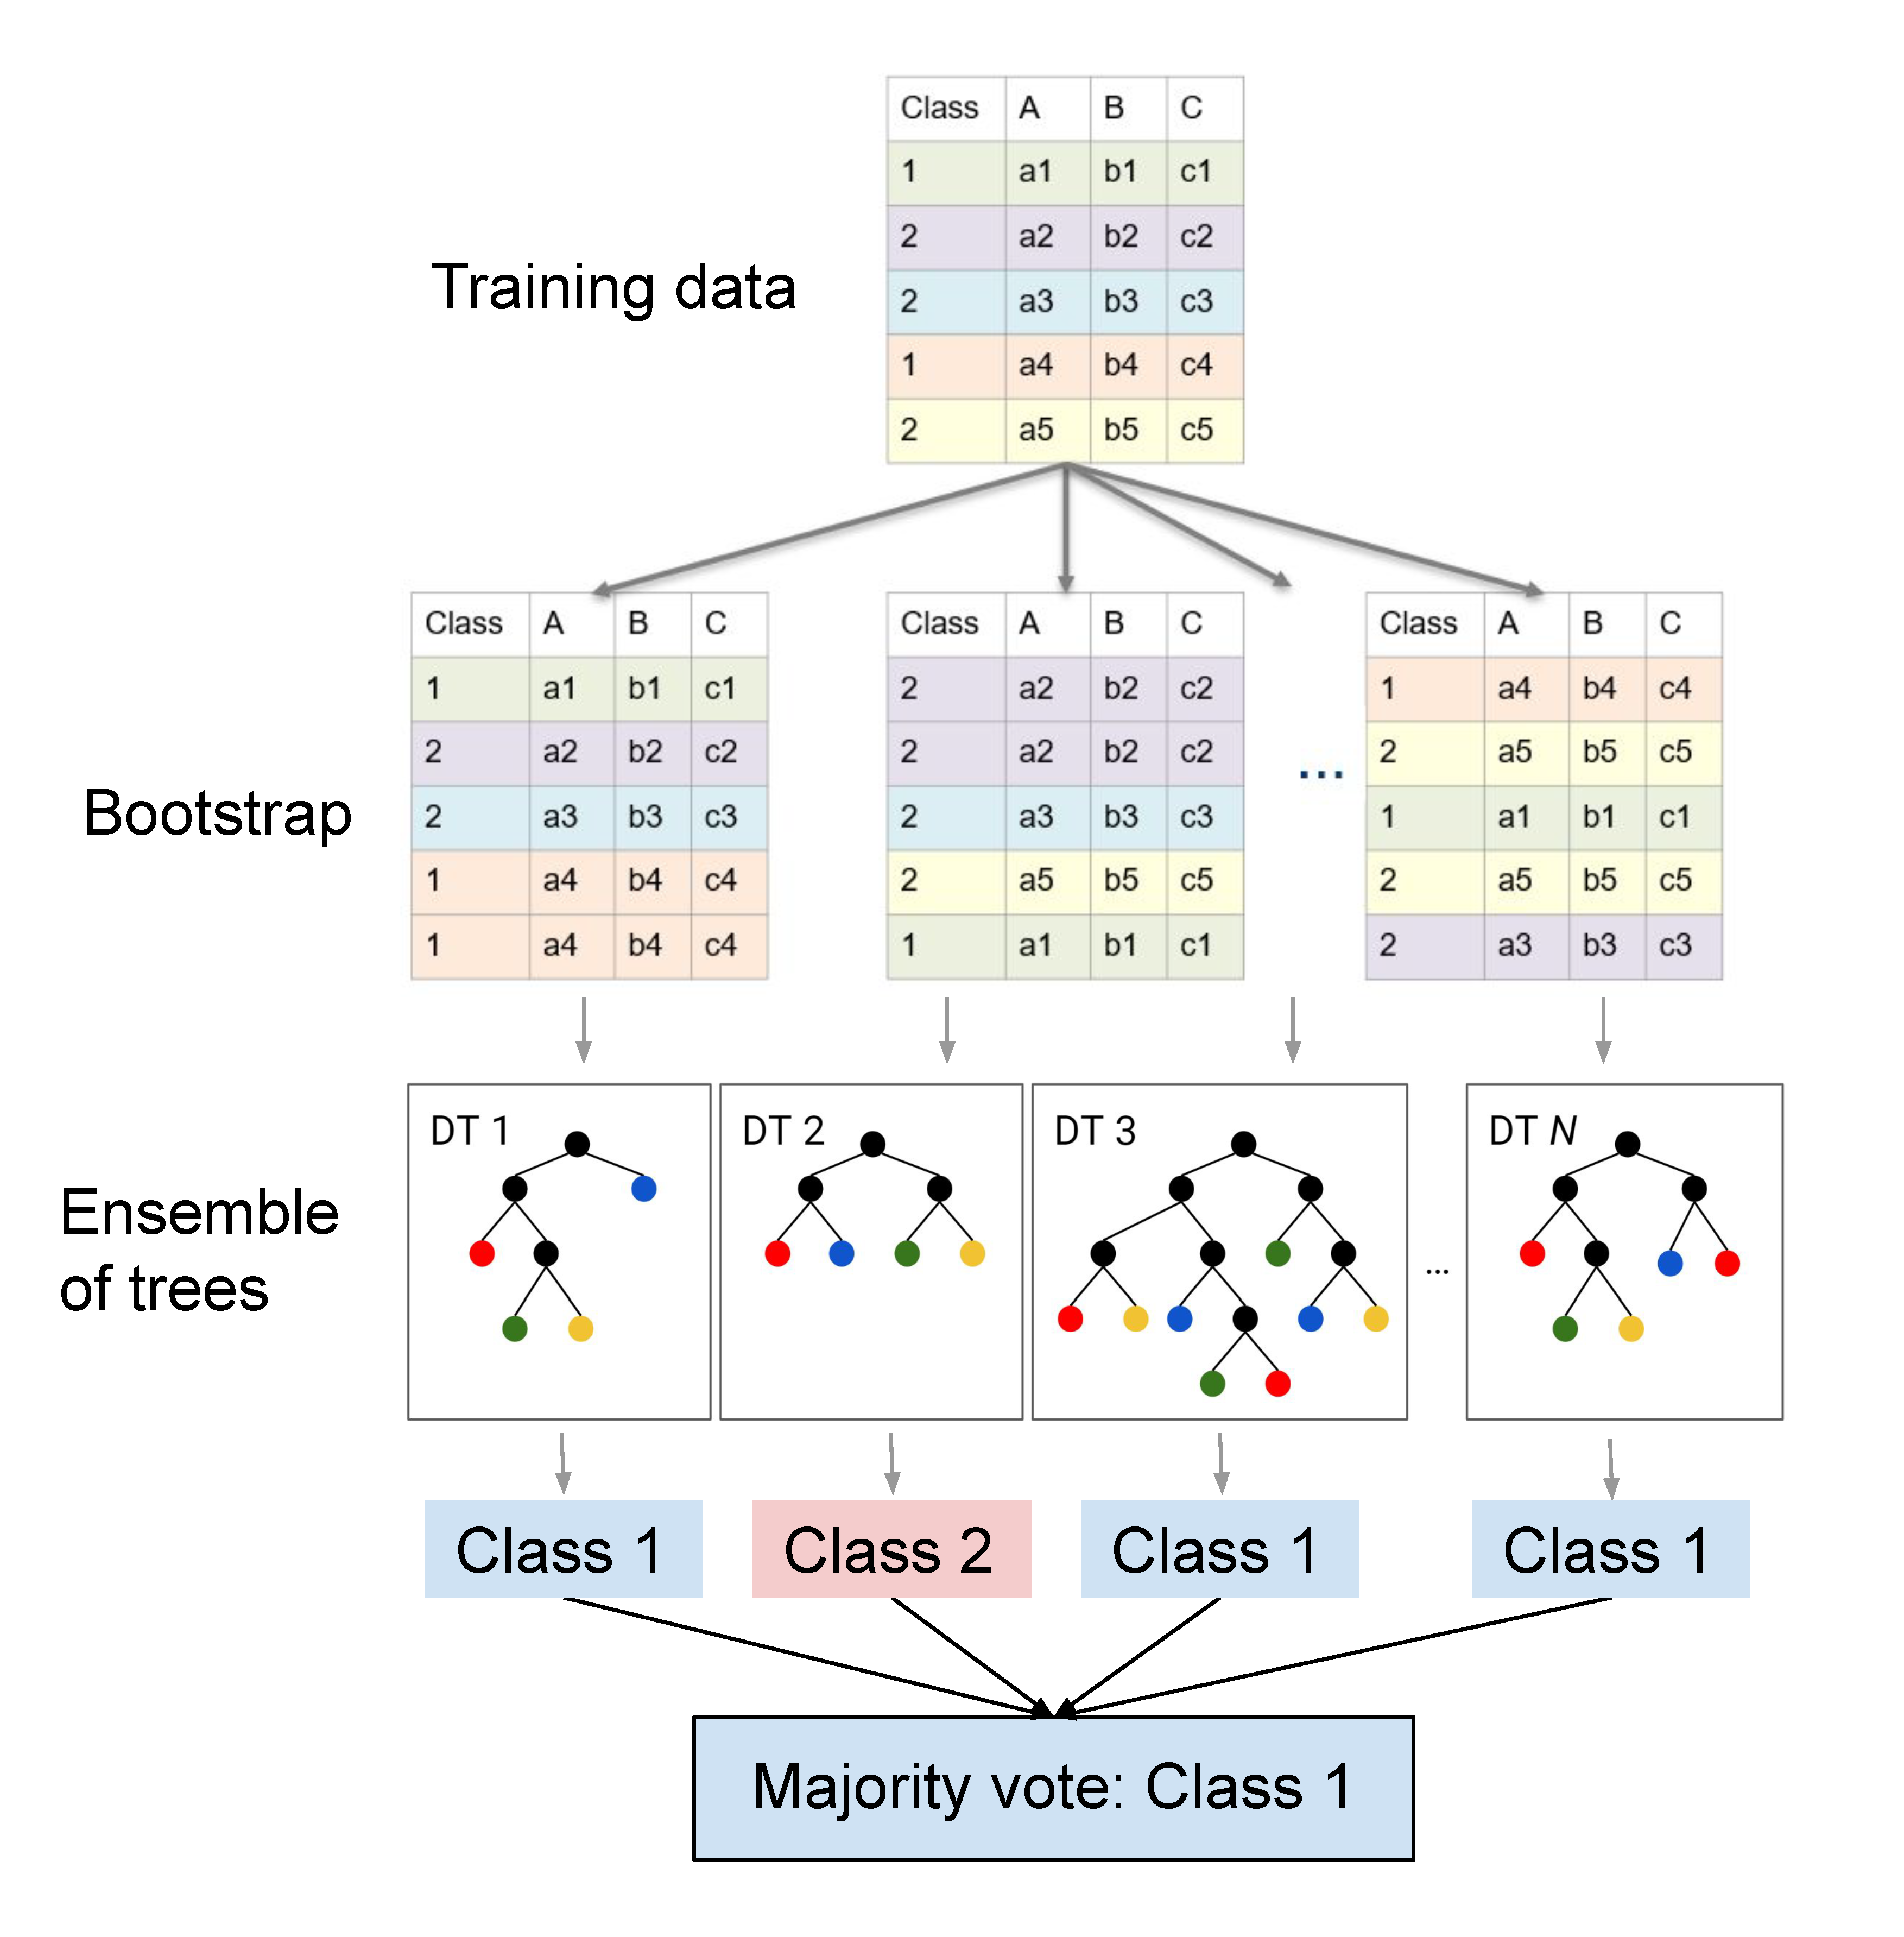

https://pages.cms.hu-berlin.de/EOL/geo_rs/S08_Image_classification2.html

No **scikit-learn**, o modelo de **árvore aleatória** é implementado através do algoritmo **Random Forest**, que é uma técnica de aprendizado de máquina baseada em árvores de decisão. Esse método pertence à classe dos **ensemble methods**, que combinam vários modelos para melhorar a precisão preditiva e reduzir o risco de overfitting. Aqui está uma descrição detalhada do modelo de árvore aleatória no scikit-learn:

### 1. **Fundamentos do Random Forest**
   - **Random Forest** constrói várias árvores de decisão durante o treinamento. Cada árvore é treinada em uma amostra aleatória do conjunto de dados (com reposição), um processo chamado **bootstrap**.
   - Além disso, para cada nó de uma árvore, uma subamostra aleatória de recursos (features) é escolhida para determinar a melhor divisão (split). Isso introduz diversidade nas árvores e ajuda a reduzir a correlação entre elas.

### 2. **Como Funciona**
   - **Treinamento**: Durante o treinamento, várias árvores de decisão são geradas de forma independente usando diferentes subconjuntos dos dados e dos atributos. Cada árvore é ajustada de forma independente.
   - **Previsão**:
     - Para **tarefa de regressão**, a média das previsões de todas as árvores é tomada como a previsão final.
     - Para **tarefa de classificação**, cada árvore “vota” e a classe com a maioria dos votos é escolhida como a previsão final.

### 3. **Principais Parâmetros no scikit-learn**
   - `n_estimators`: Número de árvores no modelo. Mais árvores podem aumentar a precisão, mas também aumentam o tempo de computação.
   - `max_depth`: Profundidade máxima das árvores. Definir esse parâmetro pode controlar o overfitting, limitando a complexidade das árvores.
   - `min_samples_split`: O número mínimo de amostras exigido para dividir um nó.
   - `min_samples_leaf`: O número mínimo de amostras que uma folha deve conter.
   - `max_features`: O número máximo de características (features) a serem consideradas ao procurar a melhor divisão em cada nó. Pode ser uma porcentagem, um número inteiro ou critérios automáticos como `sqrt` ou `log2`.
   - `bootstrap`: Define se a amostragem com reposição é usada para construir as árvores. Geralmente é `True`.
   - `random_state`: Controla a aleatoriedade dos dados de amostra e da seleção de características, garantindo resultados reprodutíveis.

### 4. **Vantagens do Random Forest**
   - **Robustez ao overfitting**: Ao combinar várias árvores, ele tende a não sofrer de overfitting tanto quanto uma árvore de decisão individual.
   - **Estabilidade**: Como o modelo faz a média de várias previsões, ele é menos sensível a variações nos dados.
   - **Escalabilidade**: Pode ser facilmente paralelo e distribuído, o que facilita sua aplicação em grandes conjuntos de dados.

### 5. **Desvantagens**
   - **Complexidade computacional**: O treinamento e a predição de um Random Forest podem ser computacionalmente caros, principalmente com muitas árvores e muitos atributos.
   - **Interpretabilidade**: Embora as árvores de decisão individuais sejam fáceis de interpretar, o Random Forest, como um conjunto de muitas árvores, pode ser mais difícil de entender como um todo.

### 6. **Implementação no scikit-learn**
No scikit-learn, o Random Forest pode ser implementado usando as classes `RandomForestClassifier` (para classificação) e `RandomForestRegressor` (para regressão). Um exemplo básico para uma tarefa de classificação seria:

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Carregar o dataset
iris_df = load_iris()
X, y = iris_df.data, iris_df.target

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(X_test)

# Avaliação da acurácia
from sklearn.metrics import accuracy_score
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")


Acurácia: 1.0


### 7. **Importância das Features**
O Random Forest também oferece uma métrica para avaliar a **importância das features**. Essa métrica indica quais variáveis foram mais usadas para fazer as divisões nas árvores e, consequentemente, quais têm maior influência nas previsões.

Para calcular a importância das features:

In [140]:
print(iris_df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [120]:
iris_df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [119]:
importances = rf.feature_importances_

for feature, importance in zip(iris_df.feature_names, importances):
    print(f'{feature}: {importance}')

sepal length (cm): 0.10410500706117767
sepal width (cm): 0.04460498814966301
petal length (cm): 0.4173081338019912
petal width (cm): 0.4339818709871682


Essa análise é útil para compreender quais variáveis são mais relevantes para o modelo.

O modelo de árvore aleatória no scikit-learn é uma poderosa técnica de aprendizado supervisionado, amplamente utilizada tanto para classificação quanto para regressão devido à sua precisão e robustez.

[LLM GPT-4]

### LAB

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
import pandas as pd
import numpy as np

import missingno as msno 
from vega_datasets import data

Dados no Titanic, um clássico em ciências dos dados!!

https://www.kaggle.com/c/titanic/data

Data Dictionary

```text
Variable    Definition	    Key
survival    Survival 	    0 = No, 1 = Yes
pclass 	    Ticket class    1 = 1st, 2 = 2nd, 3 = 3rd
sex         Sex 	
Age         Age in years 	
sibsp 	    # of siblings / spouses aboard the Titanic 	
parch 	    # of parents / children aboard the Titanic 	
ticket 	    Ticket number 	
fare 	    Passenger fare 	
cabin 	    Cabin number 	
embarked    Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton
```

Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [150]:
titanic_df = pd.read_csv("titanic/train.csv")

In [4]:
len(titanic_df)

891

In [71]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
94,95,0,3,"Coxon, Mr. Daniel",male,59.00,0,0,364500,7.2500,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.00,0,0,2667,7.2250,NaN,C
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.00,0,2,11752,26.2833,D47,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.00,0,0,350047,7.8542,NaN,S
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
740,741,1,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0000,D45,S


In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
msno.matrix(titanic_df) 

In [ ]:
msno.heatmap(titanic_df) 

In [151]:
len(titanic_df["Age"].dropna())

714

In [152]:
np.array(titanic_df.Age)

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

Atualizar os dados do campo/feature 'Age' que estão com idade < 1

In [155]:
for ind in titanic_df.index:
    if titanic_df.loc[ind, 'Age'] < 1:
        print(titanic_df.loc[ind, 'Age'] , titanic_df.loc[ind, 'Sex'])
            

In [154]:
for ind in titanic_df.index:
    if titanic_df.loc[ind, 'Age'] < 1:
        titanic_df.loc[ind, 'Age'] =  titanic_df.loc[ind, 'Age'] * 10

Preencher os dados do campo 'Age' que estão com nan

In [156]:
for ind in titanic_df.index:
    if np.isnan(titanic_df.loc[ind, 'Age']):
        print(titanic_df.loc[ind, 'Age'] , titanic_df.loc[ind, 'Sex'])

nan male
nan male
nan female
nan male
nan female
nan male
nan female
nan female
nan male
nan male
nan male
nan male
nan female
nan male
nan male
nan male
nan male
nan male
nan male
nan female
nan male
nan male
nan male
nan male
nan female
nan male
nan male
nan female
nan female
nan male
nan male
nan male
nan female
nan male
nan male
nan female
nan male
nan male
nan female
nan male
nan female
nan male
nan male
nan male
nan female
nan female
nan female
nan female
nan male
nan female
nan male
nan female
nan male
nan female
nan male
nan male
nan male
nan male
nan female
nan male
nan female
nan male
nan female
nan male
nan female
nan female
nan male
nan female
nan male
nan male
nan female
nan female
nan male
nan female
nan female
nan female
nan male
nan male
nan female
nan male
nan male
nan male
nan female
nan male
nan male
nan male
nan female
nan male
nan male
nan male
nan female
nan male
nan male
nan male
nan male
nan male
nan male
nan male
nan female
nan male
nan male
nan male
nan female

In [157]:
titanic_df["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [158]:
titanic_df.query("Sex == 'male'").Age.describe()

count    453.000000
mean      30.799558
std       14.545709
min        1.000000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [159]:
titanic_df.query("Sex == 'female'").Age.describe()

count    261.000000
mean      27.967433
std       14.022231
min        1.000000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

In [160]:
titanic_df.Age.mean()

29.764285714285716

In [161]:
titanic_df.fillna(29, inplace=True)


In [162]:
np.array(titanic_df.Age)

array([22. , 38. , 26. , 35. , 35. , 29. , 54. ,  2. , 27. , 14. ,  4. ,
       58. , 20. , 39. , 14. , 55. ,  2. , 29. , 31. , 29. , 35. , 34. ,
       15. , 28. ,  8. , 38. , 29. , 19. , 29. , 29. , 40. , 29. , 29. ,
       66. , 28. , 42. , 29. , 21. , 18. , 14. , 40. , 27. , 29. ,  3. ,
       19. , 29. , 29. , 29. , 29. , 18. ,  7. , 21. , 49. , 29. , 65. ,
       29. , 21. , 28.5,  5. , 11. , 22. , 38. , 45. ,  4. , 29. , 29. ,
       29. , 19. , 17. , 26. , 32. , 16. , 21. , 26. , 32. , 25. , 29. ,
       29. ,  8.3, 30. , 22. , 29. , 29. , 28. , 17. , 33. , 16. , 29. ,
       23. , 24. , 29. , 20. , 46. , 26. , 59. , 29. , 71. , 23. , 34. ,
       34. , 28. , 29. , 21. , 33. , 37. , 28. , 21. , 29. , 38. , 29. ,
       47. , 14.5, 22. , 20. , 17. , 21. , 70.5, 29. , 24. ,  2. , 21. ,
       29. , 32.5, 32.5, 54. , 12. , 29. , 24. , 29. , 45. , 33. , 20. ,
       47. , 29. , 25. , 23. , 19. , 37. , 16. , 24. , 29. , 22. , 24. ,
       19. , 18. , 19. , 27. ,  9. , 36.5, 42. , 51

In [163]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
461,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,29,S
650,651,0,3,"Mitkoff, Mr. Mito",male,29.0,0,0,349221,7.8958,29,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,29,S
601,602,0,3,"Slabenoff, Mr. Petco",male,29.0,0,0,349214,7.8958,29,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,29,C
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,29,C
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,29,S
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,29,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S


Agora, dados categóricos (texto) para numérico

In [164]:
titanic_df["SexNumber"] = titanic_df['Sex'].map({'male': 100, 'female': 200})

In [166]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexNumber
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S,100
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,29,S,100
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,29,C,100
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,100
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,29,S,100
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,200
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,29,S,100
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,200
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,29.0,0,0,370370,7.7500,29,Q,200
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,29,S,100


In [167]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexNumber
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.612458,0.523008,0.381594,32.204208,135.241302
std,257.353842,0.486592,0.836071,12.902666,1.102743,0.806057,49.693429,47.799007
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,100.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,100.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,200.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,200.000000


In [168]:
x_df = titanic_df[["Pclass","SexNumber","Age"]]
y_df = titanic_df["Survived"]

In [169]:
r_forest_model = RandomForestClassifier()

Treinamento do modelo:

In [170]:
r_forest_model.fit(x_df, y_df)

RandomForestClassifier()

In [171]:
r_forest_model.score(x_df, y_df)

0.8787878787878788

In [172]:
predict_dict = {"Pclass": 1,
                "SexNumber": 200,
                "Age": 22}

r_forest_model.predict(pd.DataFrame(predict_dict, index=[1]))

array([1])

In [173]:
r_forest_model.predict([[3, 200, 12]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [174]:
r_forest_model.predict(titanic_df[["Pclass","SexNumber","Age"]])

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [175]:
titanic_df["dead_or_alive_rforest"] = r_forest_model.predict(titanic_df[["Pclass","SexNumber","Age"]])

In [176]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexNumber,dead_or_alive_rforest
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29,S,100,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,200,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29,S,200,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,200,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29,S,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,29,S,100,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,200,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,29,S,200,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,100,1


In [177]:
titanic_df[["Survived","dead_or_alive_rforest"]]

,Survived,dead_or_alive_rforest
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,1


In [178]:
x_df.keys()

Index(['Pclass', 'SexNumber', 'Age'], dtype='object')

In [179]:
importances = r_forest_model.feature_importances_

for feature, importance in zip(x_df.keys(), importances):
    print(f'{feature}: {importance}')

Pclass: 0.17619078337782676
SexNumber: 0.41701212479971483
Age: 0.40679709182245843


### Tudo junto e misturado

> Puting it all toguether with Scikit-learn

1. Importa LIBs
2. Importa dados (já préviamente tratados)
3. Divide dados para teste e treinamento
4. Roda o treinamento (ML) - fit
5. Testa
6. Verifiaca acurácia do modelo

O modelo **KNeighborsClassifier** do Scikit-learn é um algoritmo de aprendizado supervisionado baseado no conceito de "instâncias próximas" (ou vizinhos mais próximos). Ele classifica novos dados comparando-os com os exemplos de treinamento mais semelhantes, ou seja, os "k" vizinhos mais próximos, onde "k" é um número definido pelo usuário. Para determinar os vizinhos mais próximos, ele utiliza uma métrica de distância (como a euclidiana). A classe atribuída a um novo dado é aquela que é mais frequente entre os "k" vizinhos. O KNeighborsClassifier é simples, não requer um processo de treinamento explícito e é eficaz em problemas com fronteiras de decisão complexas, mas pode ser computacionalmente caro em grandes conjuntos de dados, pois precisa calcular as distâncias em tempo de execução. [LLM GPT-4]

In [134]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

# X: amostra de dados (sample)
# y: label/tag para ML supervisionada

X, y = iris.data[:, :2], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.631578947368421

> Isto é bem a atividade de um Engenheiro de Machine Larning

O papel do **Engenheiro de Machine Learning** é projetar, desenvolver e implementar sistemas baseados em aprendizado de máquina (ML) que transformem dados em modelos preditivos para resolver problemas reais. Esse profissional atua na coleta e preparação de dados, escolha e implementação de algoritmos, ajuste de hiperparâmetros, e otimização de modelos para garantir desempenho eficiente e preciso. Ele também lida com a escalabilidade dos sistemas de ML, a integração dos modelos em produtos ou serviços, o monitoramento contínuo para melhorar a acurácia e a eficiência, e a manutenção desses modelos em produção. Além disso, trabalha em estreita colaboração com cientistas de dados, engenheiros de software e especialistas em áreas de negócios para garantir que as soluções de ML atendam às necessidades da empresa. [LLM GPT-4]

### LAB

Experimentar...

1. Verificar se você sobreviveria ao terrível naufrágio do Titanic com este modelo
1. Experimentar estatística descritiva para preencher a coluna `Age` do data set Titanic e rodar o modelo novamente (moda, média, mediana, std, etc...), ou usar interpolação...
1. Limpar melhor os dados do Titanic e rodar o modelo novamente
1. Importar os dados de teste do Titanic arquivo __titanic/test.csv__ e verificar a acuracia do modelo
1. Usar outro conjunto de dados com o **Random Forest** do **scikit-learn** do vegas dataset
1. Explicar para o colega ao lado (pairing) o que é IA, ML e o modelo de **Random Forest**
1. Experimentar regressão
1. Elaborar visualizações
1. Com o colega ao lado, analisar e entender o gráfico de **Random Forest**
1. Com o colega ao lado (pairing), discutir pros e cons dos modelos **Decision Tree** e **Random Forest**

### Reference:

- https://scikit-learn.org/stable/
- https://scikit-learn.org/stable/modules/tree.html
- https://machinelearningmastery.com/make-predictions-scikit-learn/
- https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
- https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Próxima aula

- Modelos de agregação, ML não supervisionada
- Salvar modelo treinado
- Reutilizar modelo treinado
- Criar WEB API com Flesk para fornecer o modelo como WEB Service (Microserviço)

<hr>

### Extra: Dica

Os modelos **ensemble** no **scikit-learn** são técnicas de aprendizado de máquina que combinam as previsões de vários modelos base para criar um modelo mais robusto e preciso. A ideia principal por trás dos métodos ensemble é que combinar diversos modelos geralmente resulta em melhores resultados do que confiar em um único modelo. Esses métodos são amplamente usados em tarefas de classificação e regressão e podem ser categorizados em três principais tipos:

### 1. **Bagging (Bootstrap Aggregating)**
O **Bagging** é uma técnica que gera vários modelos de aprendizado (geralmente do mesmo tipo) treinados em diferentes subconjuntos de dados gerados por amostragem com reposição (bootstrap). As previsões finais são baseadas na média (para regressão) ou votação da maioria (para classificação) das previsões dos modelos individuais.

#### Principais Implementações no scikit-learn:
- **`BaggingClassifier`**: Constrói vários classificadores a partir de diferentes subconjuntos de amostras e características.
- **`BaggingRegressor`**: Similar ao `BaggingClassifier`, mas para problemas de regressão.

#### Exemplo:

In [125]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar dados
X, y = load_iris(return_X_y=True)

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo base (árvore de decisão)
base_estimator = DecisionTreeClassifier()

# Bagging
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
accuracy = bagging.score(X_test, y_test)
print(f'Acurácia do Bagging: {accuracy}')

Acurácia do Bagging: 1.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


#### Vantagens do Bagging:
- **Reduz o overfitting**: Utiliza diferentes subconjuntos de dados para reduzir a variância e evitar que o modelo se ajuste demais aos dados de treinamento.
- **Melhora a precisão**: A combinação de modelos reduz o erro geral.

#### Modelos baseados em Bagging:
- **Random Forest**: O `RandomForestClassifier` e o `RandomForestRegressor` são métodos baseados em Bagging, onde o modelo base é uma árvore de decisão, e são introduzidos mecanismos adicionais para aumentar a diversidade das árvores (como a seleção aleatória de atributos).

### 2. **Boosting**
O **Boosting** é uma técnica ensemble que constrói sequencialmente uma série de modelos, onde cada novo modelo corrige os erros dos modelos anteriores. Diferente do Bagging, onde os modelos são treinados de forma independente, no Boosting, os modelos são treinados de forma sequencial e colaborativa. O objetivo é focar nas amostras que foram classificadas incorretamente por modelos anteriores.

#### Principais Implementações no scikit-learn:
- **`AdaBoostClassifier`** e **`AdaBoostRegressor`**: O **AdaBoost** (Adaptive Boosting) cria uma sequência de classificadores ponderando os erros de classificação de cada estágio para melhorar no próximo.
- **`GradientBoostingClassifier`** e **`GradientBoostingRegressor`**: **Gradient Boosting** cria modelos sequenciais, minimizando uma função de perda (geralmente de forma aditiva) ao ajustar novos modelos para o resíduo (erro) dos anteriores.
- **`HistGradientBoostingClassifier`** e **`HistGradientBoostingRegressor`**: Uma implementação otimizada de Gradient Boosting que usa histogramas para grandes conjuntos de dados.

#### Exemplo de AdaBoost:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Modelo base (árvore de decisão)
base_estimator = DecisionTreeClassifier(max_depth=1)

# AdaBoost
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
accuracy = adaboost.score(X_test, y_test)
print(f'Acurácia do AdaBoost: {accuracy}')


#### Vantagens do Boosting:
- **Alta precisão**: O modelo final é uma combinação de vários modelos que iterativamente melhoram a precisão ao focar nos erros cometidos por modelos anteriores.
- **Flexível**: Pode ser usado com uma ampla gama de modelos base, como árvores de decisão, para ajustar diferentes tipos de dados.

#### Desvantagens:
- **Propenso a overfitting**: Se não houver controle adequado dos parâmetros, o Boosting pode ajustar-se muito bem aos dados de treinamento.
- **Mais lento**: O processo sequencial pode ser mais demorado em comparação com o Bagging, que é mais fácil de paralelizar.

### 3. **Stacking (Stacked Generalization)**
O **Stacking** é uma técnica ensemble que combina previsões de diferentes modelos, mas ao contrário de Bagging e Boosting, aqui um "meta-modelo" aprende a combinar as previsões dos modelos base. Os modelos base podem ser completamente diferentes (por exemplo, árvores de decisão, regressões logísticas e redes neurais), e o meta-modelo aprende a combinar as previsões para melhorar o desempenho.

#### Implementação no scikit-learn:
- **`StackingClassifier`**: Combina previsões de diferentes classificadores com um meta-classificador.
- **`StackingRegressor`**: Similar ao `StackingClassifier`, mas para tarefas de regressão.

#### Exemplo de Stacking:

In [126]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Definir estimadores base
estimators = [('dt', DecisionTreeClassifier()), ('svm', SVC(probability=True))]

# Modelo de empilhamento com meta-classificador de regressão logística
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)
accuracy = stacking.score(X_test, y_test)
print(f'Acurácia do Stacking: {accuracy}')


Acurácia do Stacking: 1.0


#### Vantagens do Stacking:
- **Combina diferentes algoritmos**: Permite combinar modelos totalmente diferentes, o que pode capturar melhor a complexidade dos dados.
- **Alta precisão**: Muitas vezes resulta em uma melhora de desempenho, já que o meta-modelo pode aprender a fazer previsões mais precisas ao combinar diferentes abordagens.

#### Desvantagens:
- **Complexidade**: O processo é mais complexo, tanto computacionalmente quanto em termos de interpretação.
- **Risco de overfitting**: Sem validação cruzada adequada, pode facilmente sobreajustar aos dados de treinamento.

### 4. **Voting (Votação)**
O **Voting** é um método ensemble simples, onde diferentes modelos fazem previsões e a saída final é decidida por maioria (para classificação) ou média (para regressão). Ele não depende de interações entre os modelos durante o treinamento, ao contrário de Boosting ou Stacking.

#### Implementação no scikit-learn:
- **`VotingClassifier`**: Combina previsões de diferentes classificadores para tarefas de classificação.
- **`VotingRegressor`**: Similar ao `VotingClassifier`, mas para tarefas de regressão.

#### Exemplo:

In [129]:
from sklearn.ensemble import VotingClassifier

# Definir os classificadores
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = SVC()

# Modelo de votação
voting = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)], voting='hard')
voting.fit(X_train, y_train)
accuracy = voting.score(X_test, y_test)
print(f'Acurácia do Voting: {accuracy}')

Acurácia do Voting: 1.0


### Conclusão

Os métodos ensemble do scikit-learn são ferramentas poderosas para melhorar a precisão e a robustez de modelos de aprendizado de máquina. Cada técnica tem suas próprias vantagens e desvantagens, sendo ideal para diferentes tipos de problemas e cenários. O uso adequado de ensembles, como Bagging, Boosting, Stacking e Voting, pode resultar em modelos mais precisos e generalizáveis.

[LLM GPT-4]